# Feature scaling

#### Below are the functions for performing logistic regression using gradient descent from the previous homework

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [103]:
X, y = load_breast_cancer(return_X_y=True)

# Add a vector of ones to the data matrix to absorb the bias term
X = np.hstack([np.ones([X.shape[0], 1]), X])

# Set the random seed so that we have reproducible experiments
np.random.seed(123)

# Split into train and test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [104]:
def sigmoid(t):
    return 1.0 / (1 + np.exp(-t))

In [105]:
def negative_log_likelihood(X, y, w):
    nll = - ( y @ np.log(sigmoid(w @ X.T)).T + (1 - y) @ (np.log(1 - sigmoid(w @ X.T))).T)
    return nll

In [106]:
def compute_loss(X, y, w, lmbda):
    return negative_log_likelihood(X, y, w) / len(y) + lmbda * 0.5 * np.linalg.norm(w[1:])**2

In [107]:
def get_gradient(X, y, w, mini_batch_indices, lmbda):
    n_batch = mini_batch_indices.shape[0]
    nll_gradient = np.dot(X[mini_batch_indices].T,sigmoid(np.dot(X[mini_batch_indices], w)) - y[mini_batch_indices])
    ones = np.ones(w.shape)
    ones[0] = 0
    reg_gradient = lmbda * ones * w
    grad = nll_gradient / n_batch + reg_gradient  
    return grad

In [108]:
def logistic_regression(X, y, num_steps, learning_rate, mini_batch_size, lmbda, verbose):
    trace = []
    n_train = X.shape[0] 
    
    w = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        permuted_idx = np.random.permutation(n_train)
        
        for idx in range(0, n_train, mini_batch_size):
            mini_batch_indices = permuted_idx[idx:idx+mini_batch_size]
            gradient = get_gradient(X, y, w, mini_batch_indices, lmbda)
            w = w - learning_rate * gradient
        
        if step % 50 == 0:
            loss = compute_loss(X, y, w, lmbda)
            trace.append(loss)
            if verbose:
                print('Step {0}, loss = {1:.4f}'.format(step, loss))
    return w, trace

In [109]:
def predict(X, w):
    return (sigmoid(np.dot(X, w)) > 0.5).astype(np.int)

## running and observing results

In [110]:
# Change this to True if you want to see loss values over iterations.
verbose = False

In [116]:
n_train = X_train.shape[0]
w_full, trace_full = logistic_regression(X_train, 
                                         y_train, 
                                         num_steps=8000, 
                                         learning_rate=1e-5, 
                                         mini_batch_size=n_train, 
                                         lmbda=0.1,
                                         verbose=verbose)

In [117]:
n_train = X_train.shape[0]
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-5,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)

In [118]:
y_pred_full = predict(X_test, w_full)
y_pred_minibatch = predict(X_test, w_minibatch)

print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch)))

Full batch: accuracy: 0.9240, f1_score: 0.9384
Mini-batch: accuracy: 0.9415, f1_score: 0.9528


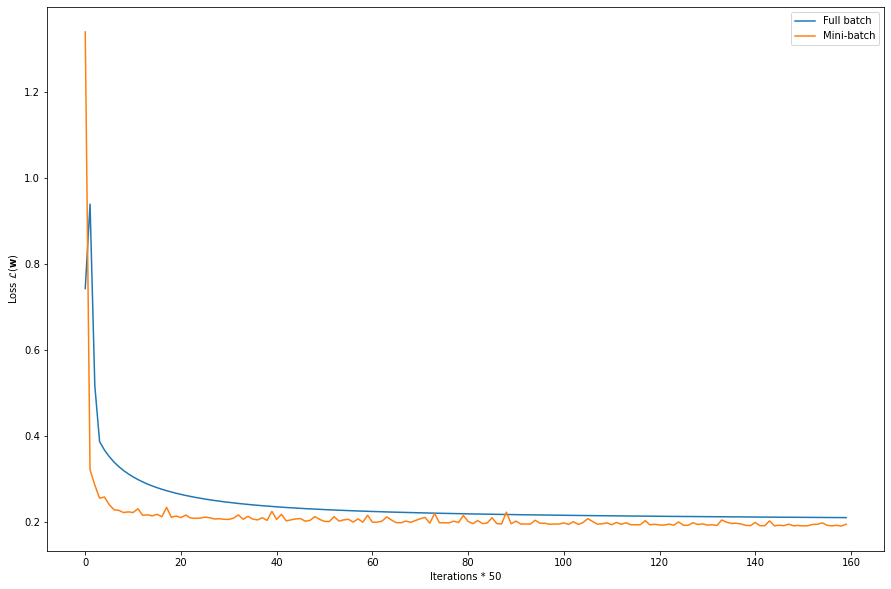

In [114]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

## Task 1: Apply minmax normalization on X_train and X_test data without sklearn
#### Note: don't do it for the first column as it is the column of ones
#### use the parameters learnt from the training data to transform the test data
#### optionally try doing it also with sklearn

In [95]:

for i in range(1,len(X_train[0])):
    for j in range(1,(X_train.shape)[1]):
        list1.append(X_train[j][i])
    min_xi = min(list1)
    max_xi = max(list1)
    for j in range((X_train.shape)[1]):
        X_train[j][i]= (X_train[j][i]-min_xi)/(max_xi-min_xi)
for i in range(1,len(X_test[0])):
    for j in range(1,(X_test.shape)[1]):
        X_test[j][i]= (X_test[j][i]-min_xi)/(max_xi-min_xi)


In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train

array([[ 1.     , 11.51   , 23.93   , ...,  0.09653,  0.2112 ,  0.08732],
       [ 1.     , 13.77   , 13.27   , ...,  0.05802,  0.2823 ,  0.06794],
       [ 1.     , 17.19   , 22.07   , ...,  0.1984 ,  0.3216 ,  0.0757 ],
       ...,
       [ 1.     , 12.05   , 22.72   , ...,  0.1092 ,  0.2191 ,  0.09349],
       [ 1.     , 20.44   , 21.78   , ...,  0.1765 ,  0.2609 ,  0.06735],
       [ 1.     , 11.74   , 14.69   , ...,  0.1056 ,  0.2604 ,  0.09879]])

## Task2: Run gradient descent using the scaled dataset and see the results
#### Note: you may change the learning rate or lambda parameters. Don't change the number of iterations to get comparable results

In [126]:
w = np.zeros(X_train.shape[1])
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-10,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)
predict(X_test, w)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Task 3: Apply z-score normalization (standard scaling) on original X_train and X_test data without sklearn
#### Note: don't do it for the first column as it is the column of ones
#### use the parameters learnt from the training data to transform the test data
#### optionally try doing it also with sklearn

In [101]:
import statistics
for i in range(1,len(X_train[0])):
    for j in range(1,(X_train.shape)[1]):
        list1.append(X_train[j][i])
    mean_xi = statistics.mean(list1)
    sd_xi = statistics.stdev(list1)
    for j in range((X_train.shape)[1]):
        X_train[j][i]= (X_train[j][i]-mean_xi)/(sd_xi)
for i in range(1,len(X_test[0])):
    for j in range(1,(X_test.shape)[1]):
        X_test[j][i]= (X_test[j][i]-mean_xi)/(sd_xi)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## Task4: Run gradient descent using the scaled dataset and see the results
#### Note: you may change the learning rate or lambda parameters. Don't change the number of iterations to get comparable results
### try to get better results than the original ones

In [127]:
w = np.zeros(X_train.shape[1])
w_minibatch, trace_minibatch = logistic_regression(X_train, 
                                                   y_train, 
                                                   num_steps=8000, 
                                                   learning_rate=1e-10,
                                                   mini_batch_size=50, 
                                                   lmbda=0.1,
                                                   verbose=verbose)
predict(X_test, w)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])